In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# GPU 디바이스 목록 가져오기
gpu_devices = tf.config.list_physical_devices('GPU')

# GPU가 존재하는지 여부 확인
if len(gpu_devices) > 0:
    print("GPU가 존재합니다.")
else:
    print("GPU를 찾을 수 없습니다.")


GPU가 존재합니다.


In [3]:
train_df = pd.read_csv("./open/train.csv")
train_df

ID                     img_path mask_path  나이       수술연월일  진단명   
0    BC_01_0001  ./train_imgs/BC_01_0001.png         -  63  2015-10-23    1  \
1    BC_01_0002  ./train_imgs/BC_01_0002.png         -  51  2015-10-28    1   
2    BC_01_0003  ./train_imgs/BC_01_0003.png         -  37  2015-10-29    1   
3    BC_01_0004  ./train_imgs/BC_01_0004.png         -  54  2016-03-08    1   
4    BC_01_0005  ./train_imgs/BC_01_0005.png         -  57  2015-10-30    1   
..          ...                          ...       ...  ..         ...  ...   
995  BC_01_3464  ./train_imgs/BC_01_3464.png         -  65  2006-12-22    1   
996  BC_01_3482  ./train_imgs/BC_01_3482.png         -  48  2006-11-17    1   
997  BC_01_3485  ./train_imgs/BC_01_3485.png         -  64  2006-11-10    1   
998  BC_01_3502  ./train_imgs/BC_01_3502.png         -  50  2006-09-22    1   
999  BC_01_3518  ./train_imgs/BC_01_3518.png         -  76  2010-09-01    1   

     암의 위치  암의 개수  암의 장경   NG  ...  ER_Allred_score   PR  PR_Allred_score   
0        2      1   19.0  2.0  ...              8.0  1.0              6.0  \
1        1      1   22.0  3.0  ...              NaN  0.0              NaN   
2        2      1    NaN  2.0  ...              7.0  1.0              4.0   
3        2      1    0.0  3.0  ...              NaN  0.0              NaN   
4        2      1    8.0  2.0  ...              8.0  0.0              NaN   
..     ...    ...    ...  ...  ...              ...  ...              ...   
995      2      1   25.0  1.0  ...              NaN  0.0              NaN   
996      1      1    7.0  1.0  ...              NaN  1.0              NaN   
997      2      1   15.0  1.0  ...              NaN  1.0              NaN   
998      1      1    7.0  1.0  ...              NaN  0.0              NaN   
999      2      1   20.0  3.0  ...              4.0  0.0              2.0   

     KI-67_LI_percent  HER2  HER2_IHC  HER2_SISH  HER2_SISH_ratio   
0                12.0   0.0       1.0        NaN              NaN  \
1                70.0   0.0       0.0        NaN              NaN   
2                 7.0   0.0       1.0        NaN              NaN   
3                 1.0   1.0       3.0        NaN              NaN   
4                 8.0   1.0       2.0        1.0             5.44   
..                ...   ...       ...        ...              ...   
995               NaN   0.0       0.0        NaN              NaN   
996               NaN   0.0       0.0        NaN              NaN   
997               NaN   0.0       0.0        NaN              NaN   
998               NaN   0.0       0.0        NaN              NaN   
999               NaN   0.0       1.0        NaN              NaN   

     BRCA_mutation  N_category  
0              NaN           0  
1              NaN           1  
2              0.0           0  
3              NaN           0  
4              NaN           0  
..             ...         ...  
995            NaN           1  
996            NaN           0  
997            NaN           1  
998            NaN           0  
999            NaN           1  

[1000 rows x 28 columns]

In [4]:
#상관계수 확인
# 'img_path'와 'mask_path' 컬럼 삭제하기
df_t =train_df.drop(['ID', 'img_path', 'mask_path', '수술연월일',], axis=1)
df_t.corr()

나이       진단명     암의 위치     암의 개수     암의 장경        NG   
나이                 1.000000 -0.025382  0.030878 -0.111352  0.127918  0.041033  \
진단명               -0.025382  1.000000 -0.011532  0.090882  0.006628 -0.176999   
암의 위치              0.030878 -0.011532  1.000000  0.002039 -0.005704  0.062808   
암의 개수             -0.111352  0.090882  0.002039  1.000000  0.011457  0.090424   
암의 장경              0.127918  0.006628 -0.005704  0.011457  1.000000  0.311455   
NG                 0.041033 -0.176999  0.062808  0.090424  0.311455  1.000000   
HG                 0.029207 -0.182840  0.042752  0.032388  0.353011  0.759134   
HG_score_1         0.079623 -0.268685  0.023241  0.094028  0.249808  0.450426   
HG_score_2         0.033432 -0.226373  0.030181  0.058740  0.309582  0.979197   
HG_score_3        -0.011529 -0.138698  0.053286 -0.064365  0.308494  0.507472   
DCIS_or_LCIS_여부   -0.024785  0.051068  0.048168  0.335754  0.021600  0.093745   
DCIS_or_LCIS_type  0.076697 -0.046113 -0.091311  0.061120  0.095926  0.258153   
T_category         0.096796  0.044471  0.040466  0.060099  0.809469  0.381117   
ER                -0.032975  0.082008 -0.022926  0.084056 -0.140662 -0.356530   
ER_Allred_score    0.205562  0.055227  0.018644 -0.022538  0.080298 -0.051401   
PR                -0.183891  0.030321 -0.003590  0.040935 -0.101581 -0.289941   
PR_Allred_score    0.038598  0.026178  0.042384  0.025864  0.062952 -0.015848   
KI-67_LI_percent  -0.025812 -0.095352  0.036607  0.037787  0.237337  0.517741   
HER2               0.008067 -0.077823 -0.019287 -0.121923 -0.002667  0.154768   
HER2_IHC           0.023104 -0.021894 -0.022304  0.013808 -0.015271  0.170879   
HER2_SISH          0.077032 -0.111528  0.066809  0.032223  0.112631  0.237103   
HER2_SISH_ratio    0.014711 -0.069496 -0.090225 -0.069166  0.348833  0.134898   
BRCA_mutation      0.112657 -0.073626  0.116714  0.035007 -0.078003  0.048978   
N_category         0.069017 -0.049135 -0.026330  0.268900  0.292102  0.371070   

                         HG  HG_score_1  HG_score_2  HG_score_3  ...   
나이                 0.029207    0.079623    0.033432   -0.011529  ...  \
진단명               -0.182840   -0.268685   -0.226373   -0.138698  ...   
암의 위치              0.042752    0.023241    0.030181    0.053286  ...   
암의 개수              0.032388    0.094028    0.058740   -0.064365  ...   
암의 장경              0.353011    0.249808    0.309582    0.308494  ...   
NG                 0.759134    0.450426    0.979197    0.507472  ...   
HG                 1.000000    0.645320    0.759587    0.726143  ...   
HG_score_1         0.645320    1.000000    0.429171    0.283791  ...   
HG_score_2         0.759587    0.429171    1.000000    0.520825  ...   
HG_score_3         0.726143    0.283791    0.520825    1.000000  ...   
DCIS_or_LCIS_여부    0.079670    0.137474    0.109334   -0.020977  ...   
DCIS_or_LCIS_type  0.312129    0.313604    0.265684    0.283255  ...   
T_category         0.307289    0.230123    0.244730    0.237384  ...   
ER                -0.402425   -0.221397   -0.363995   -0.404374  ...   
ER_Allred_score   -0.066178    0.022972   -0.028491   -0.190123  ...   
PR                -0.295554   -0.155470   -0.267796   -0.271423  ...   
PR_Allred_score    0.025963    0.020299    0.003563   -0.000629  ...   
KI-67_LI_percent   0.550921    0.295521    0.506303    0.563017  ...   
HER2               0.130307    0.037352    0.121347    0.162601  ...   
HER2_IHC           0.116952    0.032845    0.148694    0.108900  ...   
HER2_SISH          0.212581    0.221743    0.232563    0.067702  ...   
HER2_SISH_ratio    0.158679    0.087846    0.131684    0.217068  ...   
BRCA_mutation     -0.008124   -0.216455    0.039375    0.036129  ...   
N_category         0.247525    0.272786    0.287524    0.047555  ...   

                   ER_Allred_score        PR  PR_Allred_score   
나이                        0.205562 -0.183891         0.038598  \
진단명                       0.055227  0.030321         0.026178   
암의 

C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\envs\test2\lib\site-pa

<Axes: >

C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from current font.

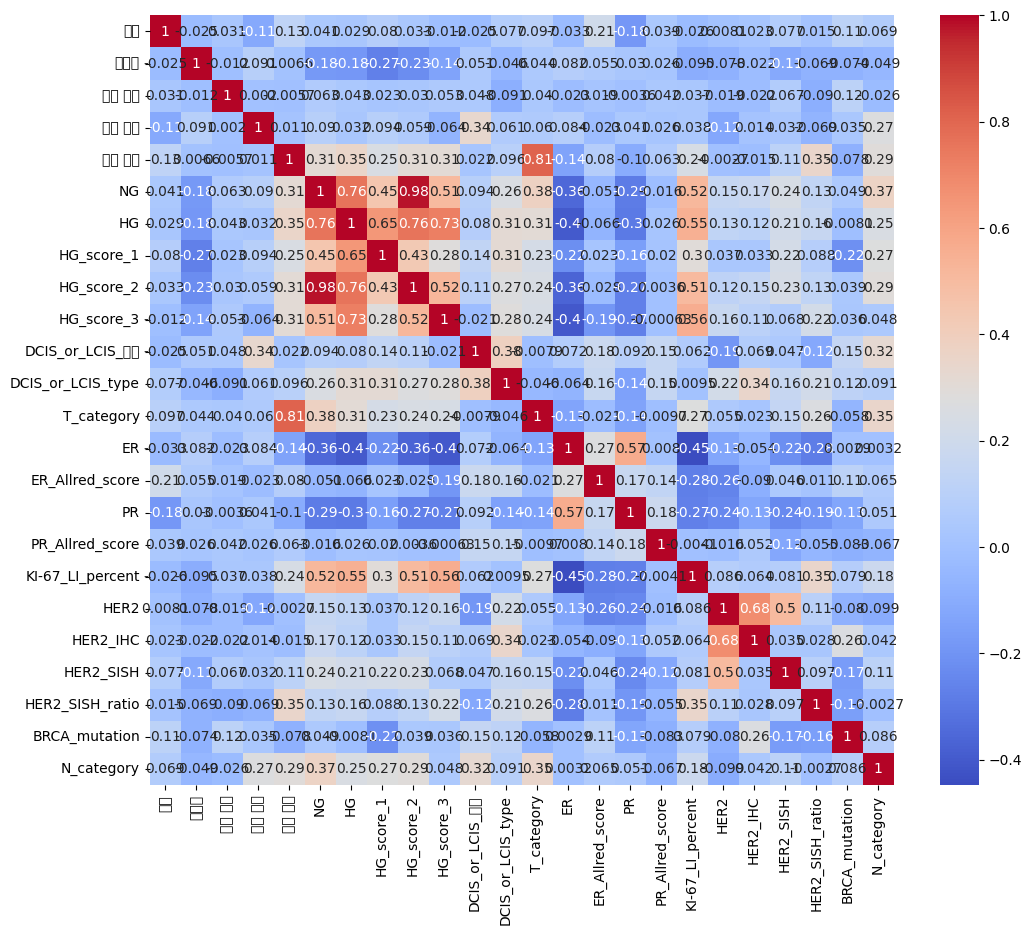

In [5]:
# 히트맵 크기 설정
plt.figure(figsize=(12, 10))

# 상관관계 계산하기
corr = df_t.corr()

# 히트맵 그리기
sns.heatmap(corr, cmap='coolwarm', annot=True)

## 결측치여부

In [6]:
# 각 컬럼 별 결측치 개수 확인
missing_values = train_df.isnull().sum()

# 결과 출력
print(missing_values)


ID                     0
img_path               0
mask_path              0
나이                     0
수술연월일                  0
진단명                    0
암의 위치                  0
암의 개수                  0
암의 장경                 69
NG                    51
HG                    86
HG_score_1            92
HG_score_2            92
HG_score_3            89
DCIS_or_LCIS_여부        0
DCIS_or_LCIS_type    874
T_category             4
ER                     1
ER_Allred_score      297
PR                     1
PR_Allred_score      453
KI-67_LI_percent     235
HER2                  14
HER2_IHC              24
HER2_SISH            753
HER2_SISH_ratio      825
BRCA_mutation        945
N_category             0
dtype: int64


#### 100이상 결측치
BRCA_mutation : 유방암 관련 유전자변이 여부   
DCIS_or_LCIS_type : 제자리 암종내 괴사 유무 // 결측치 채우기 위해선 모델을 따로 돌려서 괴사 유무 판별 필요 
HER2_SISH_ratio : HER2 SISH 비율 // 연관있는 특성 판단 불가  
HER2_SISH :  HER2 SISH 점수  // Her2와 50퍼 연관  
PR_Allred_score : 프로게스테론 수용체 양성 정도  
ER_Allred_score : 에스트로겐 수용체 양성 정도  
KI-67_LI_percent  : 세포 증식의 수치를 표시한 항목 
#### 나머지 100이하 결측치
HG_score_1  
HG_score_1  
HG_score_3
HG  
암의 장경  
NG  
HER2_IHC  
HER2  
T_category  
ER  
PR  



## BRCA_mutation

In [7]:
#BRCA_mutation는 검사 시행하지 않은 경우가 결측치 -1로 대처
train_df["BRCA_mutation"] = train_df["BRCA_mutation"].fillna(value = -1)
train_df["BRCA_mutation"]

0     -1.0
1     -1.0
2      0.0
3     -1.0
4     -1.0
      ... 
995   -1.0
996   -1.0
997   -1.0
998   -1.0
999   -1.0
Name: BRCA_mutation, Length: 1000, dtype: float64

## PR / ER
결측치가 같은 샘플에서 발생  
그래서 266번 샘플을 확인 해본 결과 NG를 제외한 나머지 칼럼에서 데이터가 존재하지 않음   
NG도 1이고 환자는 정상  
PR과 ER은 여성에 생리주기에 중요한 요인이므로 정상이라 가정하고 1로 할당

In [8]:
train_df[['ER','PR']]

ER   PR
0    1.0  1.0
1    0.0  0.0
2    1.0  1.0
3    0.0  0.0
4    1.0  0.0
..   ...  ...
995  1.0  0.0
996  1.0  1.0
997  1.0  1.0
998  0.0  0.0
999  1.0  0.0

[1000 rows x 2 columns]

In [9]:
train_df["ER"] = train_df["ER"].fillna(value = 1.0)
train_df["PR"] = train_df["PR"].fillna(value = 1.0)

## PR_Allred_score
범위0-8  
하지만 23,54 초과하는 값 존재하므로 8로 대체  

In [10]:
# 8보다 큰 값은 8로 대체
train_df.loc[train_df["PR_Allred_score"] > 8, "PR_Allred_score"] = 8

train_df["PR_Allred_score"]

0      6.0
1      NaN
2      4.0
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    2.0
Name: PR_Allred_score, Length: 1000, dtype: float64

In [11]:
train_df["PR_Allred_score"].unique()

array([ 6., nan,  4.,  8.,  2.,  7.,  5.,  3.])

In [12]:
pd.set_option('display.max_rows', None)
train_df[["PR", "PR_Allred_score"]]



PR  PR_Allred_score
0    1.0              6.0
1    0.0              NaN
2    1.0              4.0
3    0.0              NaN
4    0.0              NaN
5    0.0              NaN
6    1.0              4.0
7    1.0              8.0
8    0.0              2.0
9    1.0              4.0
10   0.0              NaN
11   0.0              NaN
12   1.0              7.0
13   1.0              8.0
14   0.0              NaN
15   0.0              NaN
16   1.0              8.0
17   1.0              8.0
18   0.0              NaN
19   1.0              4.0
20   1.0              7.0
21   0.0              NaN
22   1.0              5.0
23   1.0              7.0
24   0.0              NaN
25   1.0              5.0
26   1.0              7.0
27   1.0              7.0
28   1.0              4.0
29   0.0              NaN
30   1.0              8.0
31   1.0              8.0
32   1.0              7.0
33   0.0              NaN
34   1.0              8.0
35   1.0              6.0
36   1.0              5.0
37   1.0              6.0
38   1.0              7.0
39   1.0              5.0
40   1.0              5.0
41   0.0              NaN
42   1.0              5.0
43   0.0              NaN
44   0.0              NaN
45   0.0              NaN
46   0.0              NaN
47   0.0              NaN
48   1.0              6.0
49   1.0              8.0
50   1.0              7.0
51   1.0              8.0
52   1.0              4.0
53   1.0              6.0
54   0.0              NaN
55   1.0              5.0
56   1.0              5.0
57   0.0              NaN
58   1.0              8.0
59   1.0              8.0
60   0.0              NaN
61   1.0              4.0
62   1.0              8.0
63   1.0              6.0
64   0.0              NaN
65   1.0              4.0
66   1.0              8.0
67   1.0              8.0
68   0.0              NaN
69   1.0              4.0
70   0.0              NaN
71   1.0              8.0
72   1.0              8.0
73   1.0              7.0
74   0.0              NaN
75   0.0              NaN
76   1.0              7.0
77   1.0              6.0
78   1.0              7.0
79   0.0              NaN
80   1.0              6.0
81   1.0              5.0
82   1.0              8.0
83   1.0              4.0
84   0.0              NaN
85   1.0              4.0
86   1.0              6.0
87   1.0              7.0
88   1.0              4.0
89   1.0              6.0
90   1.0              8.0
91   1.0              6.0
92   1.0              6.0
93   1.0              7.0
94   1.0              5.0
95   1.0              6.0
96   0.0              2.0
97   1.0              7.0
98   1.0              4.0
99   1.0              7.0
100  1.0              8.0
101  1.0              8.0
102  0.0              NaN
103  0.0              NaN
104  0.0              NaN
105  1.0              4.0
106  1.0              7.0
107  1.0              7.0
108  0.0              NaN
109  0.0              NaN
110  0.0              NaN
111  1.0              8.0
112  1.0              7.0
113  1.0              8.0
114  1.0              6.0
115  0.0              NaN
116  0.0              NaN
117  1.0              7.0
118  1.0              8.0
119  0.0              NaN
120  1.0              7.0
121  1.0              6.0
122  1.0              6.0
123  1.0              7.0
124  1.0              5.0
125  0.0              NaN
126  1.0              7.0
127  1.0              8.0
128  0.0              NaN
129  1.0              5.0
130  1.0              7.0
131  1.0              4.0
132  1.0              8.0
133  0.0              NaN
134  1.0              4.0
135  1.0              8.0
136  1.0              4.0
137  0.0              NaN
138  1.0              5.0
139  0.0              NaN
140  1.0              4.0
141  1.0              6.0
142  1.0              8.0
143  1.0              8.0
144  1.0              6.0
145  1.0              6.0
146  1.0              4.0
147  0.0              NaN
148  1.0              7.0
149  1.0              6.0
150  1.0              4.0
151  1.0              4.0
152  0.0              NaN
15

In [13]:
print(train_df['PR_Allred_score'].median())

6.0


In [14]:
column_to_fill = 'PR_Allred_score'
condition1 = train_df[column_to_fill].isnull() & (train_df['PR'] == 1.0)
condition2 = train_df[column_to_fill].isnull() & (train_df['PR'] == 0.0)
train_df.loc[condition1, column_to_fill] = 6
train_df.loc[condition2, column_to_fill] = 2

In [15]:
train_df

ID                     img_path                     mask_path   
0    BC_01_0001  ./train_imgs/BC_01_0001.png                             -  \
1    BC_01_0002  ./train_imgs/BC_01_0002.png                             -   
2    BC_01_0003  ./train_imgs/BC_01_0003.png                             -   
3    BC_01_0004  ./train_imgs/BC_01_0004.png                             -   
4    BC_01_0005  ./train_imgs/BC_01_0005.png                             -   
5    BC_01_0006  ./train_imgs/BC_01_0006.png                             -   
6    BC_01_0007  ./train_imgs/BC_01_0007.png                             -   
7    BC_01_0008  ./train_imgs/BC_01_0008.png                             -   
8    BC_01_0009  ./train_imgs/BC_01_0009.png                             -   
9    BC_01_0010  ./train_imgs/BC_01_0010.png                             -   
10   BC_01_0012  ./train_imgs/BC_01_0012.png                             -   
11   BC_01_0013  ./train_imgs/BC_01_0013.png                             -   
12   BC_01_0014  ./train_imgs/BC_01_0014.png                             -   
13   BC_01_0015  ./train_imgs/BC_01_0015.png  ./train_masks/BC_01_0015.png   
14   BC_01_0062  ./train_imgs/BC_01_0062.png                             -   
15   BC_01_0178  ./train_imgs/BC_01_0178.png                             -   
16   BC_01_0204  ./train_imgs/BC_01_0204.png                             -   
17   BC_01_0213  ./train_imgs/BC_01_0213.png                             -   
18   BC_01_0214  ./train_imgs/BC_01_0214.png                             -   
19   BC_01_0215  ./train_imgs/BC_01_0215.png                             -   
20   BC_01_0216  ./train_imgs/BC_01_0216.png                             -   
21   BC_01_0217  ./train_imgs/BC_01_0217.png                             -   
22   BC_01_0218  ./train_imgs/BC_01_0218.png                             -   
23   BC_01_0223  ./train_imgs/BC_01_0223.png                             -   
24   BC_01_0224  ./train_imgs/BC_01_0224.png                             -   
25   BC_01_0226  ./train_imgs/BC_01_0226.png                             -   
26   BC_01_0227  ./train_imgs/BC_01_0227.png                             -   
27   BC_01_0229  ./train_imgs/BC_01_0229.png                             -   
28   BC_01_0230  ./train_imgs/BC_01_0230.png                             -   
29   BC_01_0232  ./train_imgs/BC_01_0232.png                             -   
30   BC_01_0234  ./train_imgs/BC_01_0234.png                             -   
31   BC_01_0238  ./train_imgs/BC_01_0238.png                             -   
32   BC_01_0240  ./train_imgs/BC_01_0240.png                             -   
33   BC_01_0245  ./train_imgs/BC_01_0245.png                             -   
34   BC_01_0246  ./train_imgs/BC_01_0246.png                             -   
35   BC_01_0249  ./train_imgs/BC_01_0249.png                             -   
36   BC_01_0250  ./train_imgs/BC_01_0250.png                             -   
37   BC_01_0252  ./train_imgs/BC_01_0252.png                             -   
38   BC_01_0254  ./train_imgs/BC_01_0254.png                             -   
39   BC_01_0255  ./train_imgs/BC_01_0255.png                             -   
40   BC_01_0257  ./train_imgs/BC_01_0257.png                             -   
41   BC_01_0261  ./train_imgs/BC_01_0261.png                             -   
42   BC_01_0262  ./train_imgs/BC_01_0262.png                             -   
43   BC_01_0263  ./train_imgs/BC_01_0263.png                             -   
44   BC_01_0264  ./train_imgs/BC_01_0264.png                             -   
45   BC_01_0268  ./train_imgs/BC_01_0268.png                             -   
46   BC_01_0270  ./train_imgs/BC_01_0270.png                             -   
47   BC_01_0271  ./train_imgs/BC_01_0271.png                             -   
48   BC_01_0273  ./train_imgs/BC_01_0273.png                             -   
49   BC_01_0276  ./train_imgs/BC_01_0276.png                             -   
50   BC_01_0282  ./train_imgs/BC_01

In [16]:
# 각 컬럼 별 결측치 개수 확인
missing_values = train_df['PR_Allred_score'].isnull().sum()

# 결과 출력
print(missing_values)


0


## ER_Allred_score

In [17]:
train_df["ER_Allred_score"].unique()

array([ 8., nan,  7.,  4.,  6.,  5.,  3.])

In [18]:
train_df[["ER_Allred_score","ER"]]

ER_Allred_score   ER
0                8.0  1.0
1                NaN  0.0
2                7.0  1.0
3                NaN  0.0
4                8.0  1.0
5                4.0  1.0
6                6.0  1.0
7                8.0  1.0
8                7.0  1.0
9                7.0  1.0
10               8.0  1.0
11               NaN  0.0
12               8.0  1.0
13               7.0  1.0
14               NaN  0.0
15               NaN  0.0
16               8.0  1.0
17               8.0  1.0
18               NaN  0.0
19               6.0  1.0
20               8.0  1.0
21               NaN  0.0
22               7.0  1.0
23               7.0  1.0
24               NaN  0.0
25               8.0  1.0
26               7.0  1.0
27               7.0  1.0
28               4.0  1.0
29               NaN  0.0
30               7.0  1.0
31               6.0  1.0
32               7.0  1.0
33               NaN  0.0
34               7.0  1.0
35               7.0  1.0
36               7.0  1.0
37               6.0  1.0
38               6.0  1.0
39               8.0  1.0
40               7.0  1.0
41               5.0  1.0
42               7.0  1.0
43               NaN  0.0
44               NaN  0.0
45               NaN  0.0
46               7.0  1.0
47               NaN  0.0
48               6.0  1.0
49               7.0  1.0
50               7.0  1.0
51               7.0  1.0
52               7.0  1.0
53               8.0  1.0
54               7.0  1.0
55               7.0  1.0
56               7.0  1.0
57               7.0  1.0
58               8.0  1.0
59               8.0  1.0
60               NaN  0.0
61               7.0  1.0
62               7.0  1.0
63               8.0  1.0
64               7.0  1.0
65               7.0  1.0
66               7.0  1.0
67               6.0  1.0
68               6.0  1.0
69               6.0  1.0
70               NaN  0.0
71               7.0  1.0
72               7.0  1.0
73               7.0  1.0
74               7.0  1.0
75               5.0  1.0
76               7.0  1.0
77               5.0  1.0
78               7.0  1.0
79               8.0  1.0
80               7.0  1.0
81               8.0  1.0
82               7.0  1.0
83               6.0  1.0
84               7.0  1.0
85               7.0  1.0
86               6.0  1.0
87               7.0  1.0
88               6.0  1.0
89               7.0  1.0
90               7.0  1.0
91               7.0  1.0
92               6.0  1.0
93               6.0  1.0
94               7.0  1.0
95               6.0  1.0
96               6.0  1.0
97               8.0  1.0
98               7.0  1.0
99               7.0  1.0
100              7.0  1.0
101              7.0  1.0
102              8.0  1.0
103              8.0  1.0
104              8.0  1.0
105              8.0  1.0
106              7.0  1.0
107              7.0  1.0
108              7.0  1.0
109              NaN  0.0
110              7.0  1.0
111              8.0  1.0
112              8.0  1.0
113              7.0  1.0
114              8.0  1.0
115              NaN  0.0
116              NaN  0.0
117              7.0  1.0
118              6.0  1.0
119              3.0  1.0
120              8.0  1.0
121              6.0  1.0
122              7.0  1.0
123              5.0  1.0
124              7.0  1.0
125              NaN  0.0
126              7.0  1.0
127              7.0  1.0
128              7.0  1.0
129              7.0  1.0
130              7.0  1.0
131              7.0  1.0
132              8.0  1.0
133              8.0  1.0
134              8.0  1.0
135              8.0  1.0
136              8.0  1.0
137              8.0  1.0
138              8.0  1.0
139              7.0  1.0
140              7.0  1.0
141              6.0  1.0
142              6.0  1.0
143              7.0  1.0
144              7.0  1.0
145              8.0  1.0
146              7.0  1.0
147              NaN  0.0
148              7.0  1.0
149              7.0  1.0
150              8.0  1.0
151              7.0  1.0
152              NaN  0.0
1

In [19]:
# 3이하는 대부분 음성(0) 이상은 3~8 양성 이므로 ER에 따라서 적용
#음성은 2 양성은 7
combination_counts_ER = train_df.groupby(['ER','ER_Allred_score']).size().reset_index(name='Count')

print(combination_counts_ER)

    ER  ER_Allred_score  Count
0  0.0              3.0      4
1  1.0              3.0      9
2  1.0              4.0     10
3  1.0              5.0     69
4  1.0              6.0     43
5  1.0              7.0    295
6  1.0              8.0    273


In [20]:
# 결측치는 첫번째 조건과 2번째 조건만 해당하므로 다른 결측치 코드는 작성하지 않음
column_to_fill = 'ER_Allred_score'
condition1 = train_df[column_to_fill].isnull() & (train_df['ER'] == 0)
train_df.loc[condition1, column_to_fill] = 2
condition1 = train_df[column_to_fill].isnull() & (train_df['ER'] >= 1.0)
train_df.loc[condition1, column_to_fill] = 7

In [21]:
train_df['ER_Allred_score'].unique()

array([8., 2., 7., 4., 6., 5., 3.])

In [22]:
train_df['ER_Allred_score']

0      8.0
1      2.0
2      7.0
3      2.0
4      8.0
5      4.0
6      6.0
7      8.0
8      7.0
9      7.0
10     8.0
11     2.0
12     8.0
13     7.0
14     2.0
15     2.0
16     8.0
17     8.0
18     2.0
19     6.0
20     8.0
21     2.0
22     7.0
23     7.0
24     2.0
25     8.0
26     7.0
27     7.0
28     4.0
29     2.0
30     7.0
31     6.0
32     7.0
33     2.0
34     7.0
35     7.0
36     7.0
37     6.0
38     6.0
39     8.0
40     7.0
41     5.0
42     7.0
43     2.0
44     2.0
45     2.0
46     7.0
47     2.0
48     6.0
49     7.0
50     7.0
51     7.0
52     7.0
53     8.0
54     7.0
55     7.0
56     7.0
57     7.0
58     8.0
59     8.0
60     2.0
61     7.0
62     7.0
63     8.0
64     7.0
65     7.0
66     7.0
67     6.0
68     6.0
69     6.0
70     2.0
71     7.0
72     7.0
73     7.0
74     7.0
75     5.0
76     7.0
77     5.0
78     7.0
79     8.0
80     7.0
81     8.0
82     7.0
83     6.0
84     7.0
85     7.0
86     6.0
87     7.0
88     6.0
89     7.0
90     7.0

## T_Category
clinical info에 설명된 정보를 기준으로 잡음  
암의장경과 상관계수가 0.81로 양의 상관관계를 이룸  
암의 장경이 0 DCIS_or_LCIS 여부가 1이면 0  
암의 장경 >= 20 1  
암의 장경 <= 50 2  
암의 장경 > 50 3   
pT4: 흉부벽 또는 피부로의 직접적인 확장이 있는 임의 크기의 종양입니다. (궤양 또는 피부 결절) 이므로 현 데이터로 판별 불가라고 판단  

In [23]:
train_df[["DCIS_or_LCIS_여부", "T_category","암의 장경"]]

DCIS_or_LCIS_여부  T_category   암의 장경
0                  2         1.0   19.00
1                  0         2.0   22.00
2                  1         0.0     NaN
3                  1         0.0    0.00
4                  2         1.0    8.00
5                  1         0.0    0.00
6                  1         0.0     NaN
7                  0         2.0   27.00
8                  0         1.0    9.00
9                  1         0.0     NaN
10                 2         1.0   14.00
11                 1         0.0     NaN
12                 2         1.0   11.00
13                 2         1.0   13.00
14                 2         2.0   25.00
15                 2         1.0    2.00
16                 2         1.0   15.00
17                 1         0.0     NaN
18                 1         0.0     NaN
19                 2         1.0    5.00
20                 2         1.0    5.00
21                 1         1.0   16.00
22                 2         2.0    0.10
23                 0         1.0    9.00
24                 2         1.0   11.00
25                 2         1.0   11.00
26                 2         2.0   27.00
27                 2         2.0   24.00
28                 1         1.0   10.00
29                 2         1.0    9.00
30                 0         1.0   13.00
31                 2         1.0    2.00
32                 0         2.0   22.00
33                 0         1.0    8.00
34                 2         1.0   19.00
35                 0         1.0   18.00
36                 0         1.0    7.00
37                 2         1.0    8.00
38                 2         2.0   48.00
39                 2         1.0   16.00
40                 2         1.0   19.00
41                 2         1.0   19.00
42                 2         1.0   12.00
43                 0         2.0   68.00
44                 0         1.0   19.00
45                 2         1.0    3.00
46                 2         1.0   18.00
47                 2         2.0   21.00
48                 0         1.0    6.00
49                 0         1.0    7.00
50                 2         1.0    6.00
51                 1         0.0     NaN
52                 1         0.0     NaN
53                 2         1.0   20.00
54                 0         1.0    5.00
55                 2         1.0   16.00
56                 0         1.0    4.00
57                 1         0.0     NaN
58                 1         0.0     NaN
59                 1         0.0     NaN
60                 2         1.0   20.00
61                 0         1.0   14.00
62                 2         1.0   13.00
63                 1         0.0     NaN
64                 0         1.0    5.00
65                 0         1.0   18.00
66                 2         1.0   15.00
67                 2         2.0   33.00
68                 2         1.0    3.00
69                 2         1.0   18.00
70                 2         2.0   37.00
71                 1         0.0     NaN
72                 1         0.0     NaN
73                 2         1.0   15.00
74                 2         1.0   16.00
75                 2         1.0    5.00
76                 0         1.0   11.00
77                 2         1.0   17.00
78                 0         1.0    2.00
79                 2         1.0    2.00
80                 0         2.0   23.00
81                 0         1.0   13.00
82                 2         1.0   13.00
83                 0         1.0   10.00
84                 2         2.0   21.00
85                 0         1.0   18.00
86                 0         1.0    5.00
87                 0         2.0   22.00
88                 2         2.0   22.00
89                 2         1.0   13.00
90                 2         1.0   14.00
91                 2         2.0   40.00
92                 2         2.0   24.00
93                 2         1.0   14.00
94                 1         0.0     NaN
95                 2         1.0   15.00
96                 0        

In [24]:
combination_counts = train_df.groupby(['DCIS_or_LCIS_여부', '암의 장경']).size().reset_index(name='Count')

print(combination_counts)

     DCIS_or_LCIS_여부   암의 장경  Count
0                  0    0.40      1
1                  0    0.60      1
2                  0    0.70      1
3                  0    0.90      1
4                  0    1.00      1
5                  0    2.00      4
6                  0    3.00      7
7                  0    4.00      9
8                  0    5.00     20
9                  0    6.00     16
10                 0    7.00     14
11                 0    8.00     18
12                 0    9.00     25
13                 0   10.00     29
14                 0   11.00     22
15                 0   12.00     28
16                 0   13.00     30
17                 0   14.00     17
18                 0   15.00     40
19                 0   16.00     18
20                 0   17.00     23
21                 0   18.00     32
22                 0   19.00     19
23                 0   20.00     22
24                 0   21.00     21
25                 0   22.00     29
26                 0   23.00

In [25]:
combination_counts = train_df.groupby(['DCIS_or_LCIS_여부', 'T_category','암의 장경']).size().reset_index(name='Count')

print(combination_counts)

     DCIS_or_LCIS_여부  T_category   암의 장경  Count
0                  0         1.0    0.40      1
1                  0         1.0    0.60      1
2                  0         1.0    0.70      1
3                  0         1.0    0.90      1
4                  0         1.0    1.00      1
5                  0         1.0    2.00      4
6                  0         1.0    3.00      7
7                  0         1.0    4.00      9
8                  0         1.0    5.00     20
9                  0         1.0    6.00     16
10                 0         1.0    7.00     14
11                 0         1.0    8.00     18
12                 0         1.0    9.00     25
13                 0         1.0   10.00     29
14                 0         1.0   11.00     22
15                 0         1.0   12.00     28
16                 0         1.0   13.00     30
17                 0         1.0   14.00     17
18                 0         1.0   15.00     40
19                 0         1.0   16.00

In [26]:
# 결측치는 첫번째 조건과 2번째 조건만 해당하므로 다른 결측치 코드는 작성하지 않음
column_to_fill = 'T_category'
condition1 = train_df[column_to_fill].isnull() & (train_df['암의 장경'] == 0) & (train_df['DCIS_or_LCIS_여부'] == 1.0)
train_df.loc[condition1, column_to_fill] = 0
condition1 = train_df[column_to_fill].isnull() & (train_df['암의 장경'] >= 20) & (train_df['암의 장경'] < 50)
train_df.loc[condition1, column_to_fill] = 2

In [27]:
train_df[column_to_fill].unique()

array([1., 2., 0., 4., 3.])

In [28]:
train_df["T_category"]

0      1.0
1      2.0
2      0.0
3      0.0
4      1.0
5      0.0
6      0.0
7      2.0
8      1.0
9      0.0
10     1.0
11     0.0
12     1.0
13     1.0
14     2.0
15     1.0
16     1.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     2.0
23     1.0
24     1.0
25     1.0
26     2.0
27     2.0
28     1.0
29     1.0
30     1.0
31     1.0
32     2.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     2.0
39     1.0
40     1.0
41     1.0
42     1.0
43     2.0
44     1.0
45     1.0
46     1.0
47     2.0
48     1.0
49     1.0
50     1.0
51     0.0
52     0.0
53     1.0
54     1.0
55     1.0
56     1.0
57     0.0
58     0.0
59     0.0
60     1.0
61     1.0
62     1.0
63     0.0
64     1.0
65     1.0
66     1.0
67     2.0
68     1.0
69     1.0
70     2.0
71     0.0
72     0.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     1.0
79     1.0
80     2.0
81     1.0
82     1.0
83     1.0
84     2.0
85     1.0
86     1.0
87     2.0
88     2.0
89     1.0
90     1.0

## 암의 장경
위에서 언급했듯이 Tcatecgory와 0.81로 양의상관계수

In [29]:
train_df[['T_category','암의 장경']]

T_category   암의 장경
0           1.0   19.00
1           2.0   22.00
2           0.0     NaN
3           0.0    0.00
4           1.0    8.00
5           0.0    0.00
6           0.0     NaN
7           2.0   27.00
8           1.0    9.00
9           0.0     NaN
10          1.0   14.00
11          0.0     NaN
12          1.0   11.00
13          1.0   13.00
14          2.0   25.00
15          1.0    2.00
16          1.0   15.00
17          0.0     NaN
18          0.0     NaN
19          1.0    5.00
20          1.0    5.00
21          1.0   16.00
22          2.0    0.10
23          1.0    9.00
24          1.0   11.00
25          1.0   11.00
26          2.0   27.00
27          2.0   24.00
28          1.0   10.00
29          1.0    9.00
30          1.0   13.00
31          1.0    2.00
32          2.0   22.00
33          1.0    8.00
34          1.0   19.00
35          1.0   18.00
36          1.0    7.00
37          1.0    8.00
38          2.0   48.00
39          1.0   16.00
40          1.0   19.00
41          1.0   19.00
42          1.0   12.00
43          2.0   68.00
44          1.0   19.00
45          1.0    3.00
46          1.0   18.00
47          2.0   21.00
48          1.0    6.00
49          1.0    7.00
50          1.0    6.00
51          0.0     NaN
52          0.0     NaN
53          1.0   20.00
54          1.0    5.00
55          1.0   16.00
56          1.0    4.00
57          0.0     NaN
58          0.0     NaN
59          0.0     NaN
60          1.0   20.00
61          1.0   14.00
62          1.0   13.00
63          0.0     NaN
64          1.0    5.00
65          1.0   18.00
66          1.0   15.00
67          2.0   33.00
68          1.0    3.00
69          1.0   18.00
70          2.0   37.00
71          0.0     NaN
72          0.0     NaN
73          1.0   15.00
74          1.0   16.00
75          1.0    5.00
76          1.0   11.00
77          1.0   17.00
78          1.0    2.00
79          1.0    2.00
80          2.0   23.00
81          1.0   13.00
82          1.0   13.00
83          1.0   10.00
84          2.0   21.00
85          1.0   18.00
86          1.0    5.00
87          2.0   22.00
88          2.0   22.00
89          1.0   13.00
90          1.0   14.00
91          2.0   40.00
92          2.0   24.00
93          1.0   14.00
94          0.0     NaN
95          1.0   15.00
96          2.0   25.00
97          1.0    3.00
98          1.0    8.00
99          1.0   17.00
100         1.0   10.00
101         1.0    5.00
102         2.0   26.00
103         1.0   17.00
104         4.0   71.00
105         1.0    4.00
106         1.0   15.00
107         1.0   16.00
108         1.0   15.00
109         0.0    0.00
110         2.0   31.00
111         1.0    8.00
112         0.0     NaN
113         2.0   21.00
114         0.0     NaN
115         0.0    0.00
116         3.0   71.00
117         0.0    0.00
118         1.0    6.00
119         2.0   21.00
120         1.0   20.00
121         2.0   24.00
122         1.0   14.00
123         0.0     NaN
124         1.0   17.00
125         1.0    0.70
126         2.0   32.00
127         2.0   45.00
128         2.0   26.00
129         2.0   21.00
130         1.0   20.00
131         1.0   17.00
132         1.0    6.00
133         1.0   20.00
134         1.0   12.00
135         2.0   22.00
136         1.0   11.00
137         2.0   29.00
138         2.0   21.00
139         1.0    4.00
140         1.0    4.00
141         2.0   21.00
142         0.0     NaN
143         1.0    2.00
144         1.0   16.00
145         1.0   11.00
146         1.0   10.00
147         3.0   81.00
148         2.0   21.00
149         1.0   12.00
150         1.0   13.00
151         1.0    8.00
152         1.0    3.00
153         1.0    8.00
154         2.0   38.00
155         2.0   26.00
156         1.0   19.00
157         2.0   21.00
158         2.0   47.00
159         1.0   20.00
160         2.0   25.00
161         2.0   41.00
162         2.0   35.00
163         1.0   20.00
164         2.0   24.00
165         2.0   22.

In [30]:
combination_counts3 = train_df.groupby(['T_category','암의 장경']).size().reset_index(name='Count')

print(combination_counts3)

    T_category   암의 장경  Count
0          0.0    0.00      5
1          1.0    0.20      1
2          1.0    0.35      1
3          1.0    0.40      1
4          1.0    0.60      1
5          1.0    0.70      1
6          1.0    0.90      2
7          1.0    1.00      2
8          1.0    1.50      1
9          1.0    2.00     11
10         1.0    3.00     15
11         1.0    4.00     15
12         1.0    5.00     28
13         1.0    6.00     24
14         1.0    7.00     19
15         1.0    8.00     28
16         1.0    9.00     33
17         1.0   10.00     37
18         1.0   11.00     33
19         1.0   12.00     38
20         1.0   13.00     45
21         1.0   14.00     29
22         1.0   15.00     56
23         1.0   16.00     34
24         1.0   17.00     35
25         1.0   18.00     45
26         1.0   19.00     31
27         1.0   20.00     33
28         1.0   25.00      1
29         2.0    0.10      1
30         2.0    9.00      1
31         2.0   21.00     42
32        

In [31]:
# 조건에 맞는 값을 필터링하여 추출합니다.
cancer_long_1 = (train_df['암의 장경'] >= 0) &  (train_df['암의 장경'] < 20)
cancer_long_2 = (train_df['암의 장경'] >= 20) &  (train_df['암의 장경'] < 50)
cancer_long_3 = (train_df['암의 장경'] > 50)
filtered_values1 = train_df.loc[cancer_long_1, '암의 장경']  # 조건에 맞는 값 추출
filtered_values2 = train_df.loc[cancer_long_2, '암의 장경']  # 조건에 맞는 값 추출
filtered_values3 = train_df.loc[cancer_long_3, '암의 장경']  # 조건에 맞는 값 추출

# 중앙값 계산
median_value1 = filtered_values1.median()
median_value2 = filtered_values2.median()
median_value3 = filtered_values3.median()
print("중앙값:", median_value1)
print("중앙값:", median_value2)
print("중앙값:", median_value3)

중앙값: 12.0
중앙값: 25.0
중앙값: 62.5


In [32]:
#결측치는 각 항목의 중앙값
column_to_fill = '암의 장경'
condition1 = train_df[column_to_fill].isnull() & (train_df['T_category'] == 0)
train_df.loc[condition1, column_to_fill] = 0
condition1 = train_df[column_to_fill].isnull() & (train_df['T_category'] >= 0) & (train_df['암의 장경'] < 20)
train_df.loc[condition1, column_to_fill] = 12.0
condition1 = train_df[column_to_fill].isnull() & (train_df['T_category'] >= 20) & (train_df['암의 장경'] < 50)
train_df.loc[condition1, column_to_fill] = 25.0
condition1 = train_df[column_to_fill].isnull() & (train_df['T_category'] > 50)
train_df.loc[condition1, column_to_fill] = 62.5

In [33]:
train_df['암의 장경'].unique()

array([1.9e+01, 2.2e+01, 0.0e+00, 8.0e+00, 2.7e+01, 9.0e+00, 1.4e+01,
       1.1e+01, 1.3e+01, 2.5e+01, 2.0e+00, 1.5e+01, 5.0e+00, 1.6e+01,
       1.0e-01, 2.4e+01, 1.0e+01, 1.8e+01, 7.0e+00, 4.8e+01, 1.2e+01,
       6.8e+01, 3.0e+00, 2.1e+01, 6.0e+00, 2.0e+01, 4.0e+00, 3.3e+01,
       3.7e+01, 1.7e+01, 2.3e+01, 4.0e+01, 2.6e+01, 7.1e+01, 3.1e+01,
       7.0e-01, 3.2e+01, 4.5e+01, 2.9e+01, 8.1e+01, 3.8e+01, 4.7e+01,
       4.1e+01, 3.5e+01, 2.8e+01, 3.4e+01, 4.4e+01, 5.8e+01, 4.6e+01,
       2.0e-01, 3.0e+01, 9.0e+01, 4.3e+01, 3.9e+01, 6.5e+01, 6.0e+01,
       7.5e+01, 4.9e+01, 3.6e+01, 4.2e+01, 5.2e+01, 1.5e+00, 5.3e+01,
       8.3e+01, 5.0e+01, 9.0e-01, 5.5e+01, 1.0e+00, 6.0e-01, 1.1e+02,
       4.0e-01, 3.5e-01, 5.7e+01])

In [34]:
train_df['암의 장경']

0       19.00
1       22.00
2        0.00
3        0.00
4        8.00
5        0.00
6        0.00
7       27.00
8        9.00
9        0.00
10      14.00
11       0.00
12      11.00
13      13.00
14      25.00
15       2.00
16      15.00
17       0.00
18       0.00
19       5.00
20       5.00
21      16.00
22       0.10
23       9.00
24      11.00
25      11.00
26      27.00
27      24.00
28      10.00
29       9.00
30      13.00
31       2.00
32      22.00
33       8.00
34      19.00
35      18.00
36       7.00
37       8.00
38      48.00
39      16.00
40      19.00
41      19.00
42      12.00
43      68.00
44      19.00
45       3.00
46      18.00
47      21.00
48       6.00
49       7.00
50       6.00
51       0.00
52       0.00
53      20.00
54       5.00
55      16.00
56       4.00
57       0.00
58       0.00
59       0.00
60      20.00
61      14.00
62      13.00
63       0.00
64       5.00
65      18.00
66      15.00
67      33.00
68       3.00
69      18.00
70      37.00
71    

## NG
이 부분은 논문을 더 이해하면서 보완할 필요가 있음
HG_score_2, KI-67_LI_percent, HG_score_3, T_category랑 상관계수가 높음

#### NG -> Hg_score_2 ->HG

In [35]:
train_df[["NG", "HG_score_2","HG", "KI-67_LI_percent"]]

NG  HG_score_2   HG  KI-67_LI_percent
0    2.0         2.0  1.0             12.00
1    3.0         3.0  3.0             70.00
2    2.0         NaN  NaN              7.00
3    3.0         3.0  3.0              1.00
4    2.0         2.0  2.0              8.00
5    3.0         3.0  3.0               NaN
6    2.0         NaN  NaN              5.00
7    3.0         3.0  2.0             15.00
8    2.0         2.0  2.0             35.00
9    1.0         NaN  NaN              7.00
10   3.0         3.0  2.0             25.00
11   2.0         NaN  NaN              3.00
12   2.0         2.0  2.0             26.26
13   2.0         2.0  1.0             10.01
14   3.0         3.0  3.0             50.96
15   3.0         3.0  2.0             89.17
16   2.0         2.0  2.0              1.98
17   NaN         NaN  NaN             17.61
18   NaN         NaN  NaN             28.66
19   2.0         2.0  2.0             20.15
20   2.0         2.0  1.0              6.63
21   NaN         NaN  NaN             17.36
22   2.0         2.0  2.0              3.81
23   2.0         2.0  2.0             13.40
24   3.0         3.0  3.0             79.66
25   2.0         2.0  2.0             24.98
26   3.0         3.0  3.0             34.01
27   2.0         2.0  2.0             19.54
28   NaN         NaN  NaN             14.91
29   3.0         3.0  3.0             47.92
30   3.0         2.0  2.0              8.08
31   3.0         3.0  2.0               NaN
32   2.0         2.0  2.0              0.55
33   2.0         2.0  1.0             11.06
34   2.0         2.0  2.0             15.18
35   2.0         2.0  1.0              1.07
36   2.0         2.0  2.0              3.25
37   2.0         2.0  2.0             15.75
38   2.0         2.0  2.0             20.06
39   2.0         2.0  1.0             16.02
40   2.0         2.0  1.0             12.37
41   3.0         3.0  2.0             25.48
42   2.0         2.0  1.0              5.00
43   3.0         3.0  3.0             44.76
44   3.0         3.0  3.0             57.40
45   2.0         2.0  2.0             10.88
46   3.0         3.0  3.0              9.51
47   3.0         3.0  3.0             19.50
48   1.0         1.0  1.0              7.11
49   2.0         2.0  1.0              4.27
50   2.0         2.0  1.0              1.19
51   1.0         NaN  NaN              7.96
52   2.0         NaN  NaN               NaN
53   2.0         2.0  2.0             34.29
54   2.0         2.0  2.0             19.31
55   2.0         2.0  1.0              9.31
56   2.0         2.0  1.0             24.96
57   2.0         NaN  NaN             15.77
58   1.0         NaN  NaN              4.97
59   2.0         NaN  NaN              7.35
60   3.0         3.0  3.0             34.89
61   2.0         2.0  2.0              2.14
62   2.0         2.0  2.0             13.97
63   2.0         NaN  NaN               NaN
64   2.0         2.0  1.0              0.19
65   2.0         2.0  1.0             11.73
66   2.0         2.0  2.0             24.99
67   3.0         3.0  3.0             45.27
68   2.0         2.0  2.0             33.86
69   2.0         2.0  2.0             21.93
70   3.0         3.0  2.0             15.50
71   1.0         NaN  NaN              8.21
72   1.0         NaN  NaN              3.03
73   2.0         2.0  2.0              5.51
74   2.0         2.0  2.0              5.48
75   1.0         1.0  1.0              0.40
76   1.0         1.0  1.0              7.03
77   3.0         3.0  2.0             25.94
78   1.0         1.0  1.0              6.75
79   2.0         2.0  1.0              8.54
80   2.0         2.0  2.0             20.22
81   2.0         2.0  2.0             20.93
82   2.0         2.0  1.0              6.38
83   2.0         2.0  1.0             31.65
84   2.0         2.0  2.0             18.86
85   2.0         2.0  1.0             36.58
86   1.0         1.0  1.0              4.60
87   3.0         3.0  2.0             31.93
88   3.0         3.0  3.0             44.92
89   2.0         2.0  2.0             11.84
90

In [36]:
#1차 작업
print(train_df['NG'].isnull().sum())
train_df['NG'].fillna(train_df['HG_score_2'], inplace=True)
print(train_df['NG'].isnull().sum())

51
23


In [37]:
#2차 작업
print(train_df['NG'].isnull().sum())
train_df['NG'].fillna(train_df['HG'], inplace=True)
print(train_df['NG'].isnull().sum())

23
22


In [38]:
train_df[["NG", "HG_score_2","HG", "KI-67_LI_percent"]]

NG  HG_score_2   HG  KI-67_LI_percent
0    2.0         2.0  1.0             12.00
1    3.0         3.0  3.0             70.00
2    2.0         NaN  NaN              7.00
3    3.0         3.0  3.0              1.00
4    2.0         2.0  2.0              8.00
5    3.0         3.0  3.0               NaN
6    2.0         NaN  NaN              5.00
7    3.0         3.0  2.0             15.00
8    2.0         2.0  2.0             35.00
9    1.0         NaN  NaN              7.00
10   3.0         3.0  2.0             25.00
11   2.0         NaN  NaN              3.00
12   2.0         2.0  2.0             26.26
13   2.0         2.0  1.0             10.01
14   3.0         3.0  3.0             50.96
15   3.0         3.0  2.0             89.17
16   2.0         2.0  2.0              1.98
17   NaN         NaN  NaN             17.61
18   NaN         NaN  NaN             28.66
19   2.0         2.0  2.0             20.15
20   2.0         2.0  1.0              6.63
21   NaN         NaN  NaN             17.36
22   2.0         2.0  2.0              3.81
23   2.0         2.0  2.0             13.40
24   3.0         3.0  3.0             79.66
25   2.0         2.0  2.0             24.98
26   3.0         3.0  3.0             34.01
27   2.0         2.0  2.0             19.54
28   NaN         NaN  NaN             14.91
29   3.0         3.0  3.0             47.92
30   3.0         2.0  2.0              8.08
31   3.0         3.0  2.0               NaN
32   2.0         2.0  2.0              0.55
33   2.0         2.0  1.0             11.06
34   2.0         2.0  2.0             15.18
35   2.0         2.0  1.0              1.07
36   2.0         2.0  2.0              3.25
37   2.0         2.0  2.0             15.75
38   2.0         2.0  2.0             20.06
39   2.0         2.0  1.0             16.02
40   2.0         2.0  1.0             12.37
41   3.0         3.0  2.0             25.48
42   2.0         2.0  1.0              5.00
43   3.0         3.0  3.0             44.76
44   3.0         3.0  3.0             57.40
45   2.0         2.0  2.0             10.88
46   3.0         3.0  3.0              9.51
47   3.0         3.0  3.0             19.50
48   1.0         1.0  1.0              7.11
49   2.0         2.0  1.0              4.27
50   2.0         2.0  1.0              1.19
51   1.0         NaN  NaN              7.96
52   2.0         NaN  NaN               NaN
53   2.0         2.0  2.0             34.29
54   2.0         2.0  2.0             19.31
55   2.0         2.0  1.0              9.31
56   2.0         2.0  1.0             24.96
57   2.0         NaN  NaN             15.77
58   1.0         NaN  NaN              4.97
59   2.0         NaN  NaN              7.35
60   3.0         3.0  3.0             34.89
61   2.0         2.0  2.0              2.14
62   2.0         2.0  2.0             13.97
63   2.0         NaN  NaN               NaN
64   2.0         2.0  1.0              0.19
65   2.0         2.0  1.0             11.73
66   2.0         2.0  2.0             24.99
67   3.0         3.0  3.0             45.27
68   2.0         2.0  2.0             33.86
69   2.0         2.0  2.0             21.93
70   3.0         3.0  2.0             15.50
71   1.0         NaN  NaN              8.21
72   1.0         NaN  NaN              3.03
73   2.0         2.0  2.0              5.51
74   2.0         2.0  2.0              5.48
75   1.0         1.0  1.0              0.40
76   1.0         1.0  1.0              7.03
77   3.0         3.0  2.0             25.94
78   1.0         1.0  1.0              6.75
79   2.0         2.0  1.0              8.54
80   2.0         2.0  2.0             20.22
81   2.0         2.0  2.0             20.93
82   2.0         2.0  1.0              6.38
83   2.0         2.0  1.0             31.65
84   2.0         2.0  2.0             18.86
85   2.0         2.0  1.0             36.58
86   1.0         1.0  1.0              4.60
87   3.0         3.0  2.0             31.93
88   3.0         3.0  3.0             44.92
89   2.0         2.0  2.0             11.84
90

In [39]:
# KI-67 labeling index에 따른 NG의 최빈값 계산
def get_mode_by_labeling_index(labeling_index):
    if labeling_index < 10:
        return 1
    elif 10 <= labeling_index < 20:
        return 2
    else:
        return 3

# NG 결측치 대체 함수
def replace_ng_with_mode_by_labeling_index(df):
    for index, row in train_df.iterrows():
        if pd.isnull(row['NG']):
            labeling_index = row['KI-67_LI_percent']
            mode = get_mode_by_labeling_index(labeling_index)
            train_df.at[index, 'NG'] = mode
    return train_df

# NG 결측치 대체 수행
train_df = replace_ng_with_mode_by_labeling_index(train_df)
train_df["NG"].unique()

array([2., 3., 1.])

## HG / HG_score_1~3

In [40]:
#1차 작업
print(train_df['HG'].isnull().sum())
train_df['HG'].fillna(train_df['NG'], inplace=True)
print(train_df['HG'].isnull().sum())

86
0


In [41]:
#score1작업 작업
print(train_df['HG_score_1'].isnull().sum())
train_df['HG_score_1'].fillna(train_df['HG'], inplace=True)
print(train_df['HG_score_1'].isnull().sum())

92
0


In [42]:
#score2작업 작업
print(train_df['HG_score_2'].isnull().sum())
train_df['HG_score_2'].fillna(train_df['NG'], inplace=True)
print(train_df['HG_score_2'].isnull().sum())

92
0


In [43]:
#score3작업 작업
print(train_df['HG_score_3'].isnull().sum())
train_df['HG_score_3'].fillna(train_df['HG'], inplace=True)
print(train_df['HG_score_3'].isnull().sum())

89
0


## KI-67_LI_percent
논
데이터 상 NG, HG_score_2~3, HG  
논문에서는 NG와 HER2와 높은 상관관계

In [44]:

train_df[["KI-67_LI_percent", "NG","HER2", "HG_score_3"]]

KI-67_LI_percent   NG  HER2  HG_score_3
0               12.00  2.0   0.0         1.0
1               70.00  3.0   0.0         3.0
2                7.00  2.0   0.0         2.0
3                1.00  3.0   1.0         2.0
4                8.00  2.0   1.0         1.0
5                 NaN  3.0   1.0         3.0
6                5.00  2.0   1.0         2.0
7               15.00  3.0   0.0         1.0
8               35.00  2.0   0.0         2.0
9                7.00  1.0   0.0         1.0
10              25.00  3.0   1.0         1.0
11               3.00  2.0   0.0         2.0
12              26.26  2.0   0.0         1.0
13              10.01  2.0   0.0         1.0
14              50.96  3.0   0.0         3.0
15              89.17  3.0   0.0         1.0
16               1.98  2.0   0.0         1.0
17              17.61  2.0   0.0         2.0
18              28.66  3.0   NaN         3.0
19              20.15  2.0   0.0         2.0
20               6.63  2.0   0.0         1.0
21              17.36  2.0   1.0         2.0
22               3.81  2.0   0.0         1.0
23              13.40  2.0   0.0         1.0
24              79.66  3.0   0.0         3.0
25              24.98  2.0   0.0         2.0
26              34.01  3.0   0.0         2.0
27              19.54  2.0   0.0         2.0
28              14.91  2.0   0.0         2.0
29              47.92  3.0   1.0         2.0
30               8.08  3.0   0.0         1.0
31                NaN  3.0   1.0         1.0
32               0.55  2.0   0.0         1.0
33              11.06  2.0   0.0         1.0
34              15.18  2.0   0.0         2.0
35               1.07  2.0   0.0         1.0
36               3.25  2.0   1.0         1.0
37              15.75  2.0   0.0         1.0
38              20.06  2.0   0.0         1.0
39              16.02  2.0   0.0         1.0
40              12.37  2.0   0.0         1.0
41              25.48  3.0   0.0         2.0
42               5.00  2.0   0.0         1.0
43              44.76  3.0   0.0         3.0
44              57.40  3.0   0.0         3.0
45              10.88  2.0   0.0         1.0
46               9.51  3.0   0.0         2.0
47              19.50  3.0   0.0         2.0
48               7.11  1.0   0.0         1.0
49               4.27  2.0   0.0         1.0
50               1.19  2.0   0.0         1.0
51               7.96  1.0   0.0         1.0
52                NaN  2.0   0.0         2.0
53              34.29  2.0   0.0         1.0
54              19.31  2.0   1.0         1.0
55               9.31  2.0   0.0         1.0
56              24.96  2.0   0.0         1.0
57              15.77  2.0   0.0         2.0
58               4.97  1.0   0.0         1.0
59               7.35  2.0   0.0         2.0
60              34.89  3.0   1.0         3.0
61               2.14  2.0   0.0         1.0
62              13.97  2.0   0.0         1.0
63                NaN  2.0   0.0         2.0
64               0.19  2.0   0.0         1.0
65              11.73  2.0   0.0         1.0
66              24.99  2.0   0.0         2.0
67              45.27  3.0   1.0         3.0
68              33.86  2.0   0.0         1.0
69              21.93  2.0   0.0         1.0
70              15.50  3.0   0.0         1.0
71               8.21  1.0   NaN         1.0
72               3.03  1.0   0.0         1.0
73               5.51  2.0   0.0         1.0
74               5.48  2.0   0.0         1.0
75               0.40  1.0   0.0         1.0
76               7.03  1.0   0.0         1.0
77              25.94  3.0   1.0         2.0
78               6.75  1.0   0.0         1.0
79               8.54  2.0   0.0         1.0
80              20.22  2.0   0.0         2.0
81              20.93  2.0   0.0         1.0
82               6.38  2.0   0.0         1.0
83              31.65  2.0   0.0         1.0
84              18.86  2.0   0.0         1.0
85              36.58  2.0   0.0         1.0
86               4.60  1.0   0.0         1.0
87              31.93  3.0   0.0         1.0


In [45]:
# NG 값들을 그룹별로 묶습니다.
ng_groups = train_df.groupby('NG')

# 각 그룹의 중앙값으로 KI 컬럼의 결측치를 채웁니다.
for ng, group in ng_groups:
    median = group['KI-67_LI_percent'].median()
    train_df.loc[train_df['NG'] == ng, 'KI-67_LI_percent'] = train_df.loc[train_df['NG'] == ng, 'KI-67_LI_percent'].fillna(median)
print(train_df['KI-67_LI_percent'].isnull().sum())

0


## 결측치 점검 및 나머지 는 0으로 대체

In [46]:
# 각 컬럼 별 결측치 개수 확인
missing_values = train_df.isnull().sum()

# 결과 출력
print(missing_values)


ID                     0
img_path               0
mask_path              0
나이                     0
수술연월일                  0
진단명                    0
암의 위치                  0
암의 개수                  0
암의 장경                  0
NG                     0
HG                     0
HG_score_1             0
HG_score_2             0
HG_score_3             0
DCIS_or_LCIS_여부        0
DCIS_or_LCIS_type    874
T_category             0
ER                     0
ER_Allred_score        0
PR                     0
PR_Allred_score        0
KI-67_LI_percent       0
HER2                  14
HER2_IHC              24
HER2_SISH            753
HER2_SISH_ratio      825
BRCA_mutation          0
N_category             0
dtype: int64


In [47]:
train_df_res = train_df.fillna(0)


In [48]:
# 각 컬럼 별 결측치 개수 확인
missing_values = train_df_res.isnull().sum()

# 결과 출력
print(missing_values)


ID                   0
img_path             0
mask_path            0
나이                   0
수술연월일                0
진단명                  0
암의 위치                0
암의 개수                0
암의 장경                0
NG                   0
HG                   0
HG_score_1           0
HG_score_2           0
HG_score_3           0
DCIS_or_LCIS_여부      0
DCIS_or_LCIS_type    0
T_category           0
ER                   0
ER_Allred_score      0
PR                   0
PR_Allred_score      0
KI-67_LI_percent     0
HER2                 0
HER2_IHC             0
HER2_SISH            0
HER2_SISH_ratio      0
BRCA_mutation        0
N_category           0
dtype: int64


In [49]:
train_df_res

ID                     img_path                     mask_path   
0    BC_01_0001  ./train_imgs/BC_01_0001.png                             -  \
1    BC_01_0002  ./train_imgs/BC_01_0002.png                             -   
2    BC_01_0003  ./train_imgs/BC_01_0003.png                             -   
3    BC_01_0004  ./train_imgs/BC_01_0004.png                             -   
4    BC_01_0005  ./train_imgs/BC_01_0005.png                             -   
5    BC_01_0006  ./train_imgs/BC_01_0006.png                             -   
6    BC_01_0007  ./train_imgs/BC_01_0007.png                             -   
7    BC_01_0008  ./train_imgs/BC_01_0008.png                             -   
8    BC_01_0009  ./train_imgs/BC_01_0009.png                             -   
9    BC_01_0010  ./train_imgs/BC_01_0010.png                             -   
10   BC_01_0012  ./train_imgs/BC_01_0012.png                             -   
11   BC_01_0013  ./train_imgs/BC_01_0013.png                             -   
12   BC_01_0014  ./train_imgs/BC_01_0014.png                             -   
13   BC_01_0015  ./train_imgs/BC_01_0015.png  ./train_masks/BC_01_0015.png   
14   BC_01_0062  ./train_imgs/BC_01_0062.png                             -   
15   BC_01_0178  ./train_imgs/BC_01_0178.png                             -   
16   BC_01_0204  ./train_imgs/BC_01_0204.png                             -   
17   BC_01_0213  ./train_imgs/BC_01_0213.png                             -   
18   BC_01_0214  ./train_imgs/BC_01_0214.png                             -   
19   BC_01_0215  ./train_imgs/BC_01_0215.png                             -   
20   BC_01_0216  ./train_imgs/BC_01_0216.png                             -   
21   BC_01_0217  ./train_imgs/BC_01_0217.png                             -   
22   BC_01_0218  ./train_imgs/BC_01_0218.png                             -   
23   BC_01_0223  ./train_imgs/BC_01_0223.png                             -   
24   BC_01_0224  ./train_imgs/BC_01_0224.png                             -   
25   BC_01_0226  ./train_imgs/BC_01_0226.png                             -   
26   BC_01_0227  ./train_imgs/BC_01_0227.png                             -   
27   BC_01_0229  ./train_imgs/BC_01_0229.png                             -   
28   BC_01_0230  ./train_imgs/BC_01_0230.png                             -   
29   BC_01_0232  ./train_imgs/BC_01_0232.png                             -   
30   BC_01_0234  ./train_imgs/BC_01_0234.png                             -   
31   BC_01_0238  ./train_imgs/BC_01_0238.png                             -   
32   BC_01_0240  ./train_imgs/BC_01_0240.png                             -   
33   BC_01_0245  ./train_imgs/BC_01_0245.png                             -   
34   BC_01_0246  ./train_imgs/BC_01_0246.png                             -   
35   BC_01_0249  ./train_imgs/BC_01_0249.png                             -   
36   BC_01_0250  ./train_imgs/BC_01_0250.png                             -   
37   BC_01_0252  ./train_imgs/BC_01_0252.png                             -   
38   BC_01_0254  ./train_imgs/BC_01_0254.png                             -   
39   BC_01_0255  ./train_imgs/BC_01_0255.png                             -   
40   BC_01_0257  ./train_imgs/BC_01_0257.png                             -   
41   BC_01_0261  ./train_imgs/BC_01_0261.png                             -   
42   BC_01_0262  ./train_imgs/BC_01_0262.png                             -   
43   BC_01_0263  ./train_imgs/BC_01_0263.png                             -   
44   BC_01_0264  ./train_imgs/BC_01_0264.png                             -   
45   BC_01_0268  ./train_imgs/BC_01_0268.png                             -   
46   BC_01_0270  ./train_imgs/BC_01_0270.png                             -   
47   BC_01_0271  ./train_imgs/BC_01_0271.png                             -   
48   BC_01_0273  ./train_imgs/BC_01_0273.png                             -   
49   BC_01_0276  ./train_imgs/BC_01_0276.png                             -   
50   BC_01_0282  ./train_imgs/BC_01

## Xgboost 사용

In [50]:
test_df = pd.read_csv("./open/test.csv")
# 'img_path'와 'mask_path' 컬럼 삭제하기
df_t = test_df.drop(['ID','img_path', '수술연월일'], axis=1)
df_tr = train_df_res.drop(['ID', 'img_path', 'mask_path', '수술연월일'], axis=1)

In [51]:
import xgboost as xgb
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 분리하기
X = df_tr.drop(['N_category'], axis=1)
y = df_tr['N_category']
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

C:\anaconda3\envs\test2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\test2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\test2\lib\site-

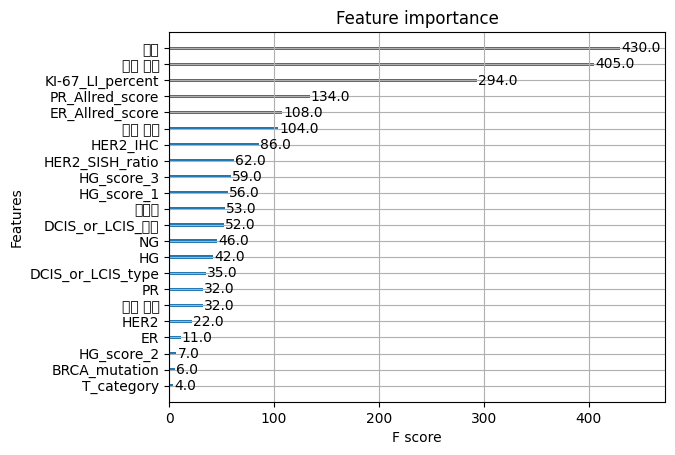

In [52]:
# XGBoost 모델 학습하기
model = xgb.XGBClassifier()
model.fit(X, y)

# feature importance 추출하기
importance = model.feature_importances_

# feature importance 시각화하기
plot_importance(model)
plt.show()

## 파라미터 최적화

In [53]:
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# 랜덤 서치를 위한 하이퍼파라미터 분포 설정
param_dist = {
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.1, 0.9),
    'colsample_bytree': uniform(0.1, 0.9),
    'gamma': uniform(0.1, 1.0),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2)
}

# XGBoost 모델 객체 생성
model = xgb.XGBClassifier(objective='binary:logistic')

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    cv=5,
    n_iter=50,
    n_jobs=-1
)

# 랜덤 서치 수행하기
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print(f'Best parameters: {random_search.best_params_}')
print(f'Accuracy: {random_search.best_score_:.5f}')

Best parameters: {'colsample_bytree': 0.2541312981134201, 'gamma': 0.3305203620439098, 'learning_rate': 0.10709506463285277, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 214, 'reg_alpha': 1.992322964324785, 'reg_lambda': 0.8072338368068301, 'subsample': 0.6781257112437227}
Accuracy: 0.77250


In [55]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2541312981134201, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3305203620439098, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10709506463285277, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=214, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
best_estimator = random_search.best_estimator_
pred = best_estimator.predict(X_test)
print('검증 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

검증 데이터 세트 정확도: 0.8000


## 검증

In [59]:
# tunRc = xgb.XGBClassifier(**opt.best_params_, objective='binary:logistic', eval_metric='auc', booster='gbtree', random_state = 42, n_jobs=-1)
tunRc = xgb.XGBClassifier(**random_search.best_params_, objective='binary:logistic', eval_metric='auc', booster='gbtree', random_state = 42, n_jobs=-1)


In [60]:
# tunRc.fit(X_train, y_train,eval_set=evalset)
tunRc.fit(X_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2541312981134201, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.3305203620439098, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10709506463285277, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=214, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [61]:
y_pred = tunRc.predict(X_test)


In [62]:
print(classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds']))     #  X_train, X_test, y_train, y_test


              precision    recall  f1-score   support

   No Frauds       0.82      0.72      0.77       100
      Frauds       0.75      0.84      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [63]:
classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)


{'No Frauds': {'precision': 0.8181818181818182,
  'recall': 0.72,
  'f1-score': 0.7659574468085107,
  'support': 100},
 'Frauds': {'precision': 0.75,
  'recall': 0.84,
  'f1-score': 0.7924528301886793,
  'support': 100},
 'accuracy': 0.78,
 'macro avg': {'precision': 0.7840909090909092,
  'recall': 0.78,
  'f1-score': 0.779205138498595,
  'support': 200},
 'weighted avg': {'precision': 0.7840909090909091,
  'recall': 0.78,
  'f1-score': 0.7792051384985951,
  'support': 200}}

In [64]:

f1score = classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

0.779205138498595

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.22

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.00%


In [68]:
# Compute the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    tunRc, X_train, y_train, cv=5, scoring='f1',n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

NameError: name 'learning_curve' is not defined

In [ ]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(tunRc, X_train, y_train, cv=5)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [69]:
y_pred_t = tunRc.predict(df_t)
y_pred_t

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0])

In [70]:
submission = pd.read_csv('./open/sample_submission.csv')
submission

ID  N_category
0    BC_01_0011           0
1    BC_01_0220           0
2    BC_01_0233           0
3    BC_01_0258           0
4    BC_01_0260           0
5    BC_01_0266           0
6    BC_01_0269           0
7    BC_01_0272           0
8    BC_01_0275           0
9    BC_01_0278           0
10   BC_01_0279           0
11   BC_01_0286           0
12   BC_01_0296           0
13   BC_01_0303           0
14   BC_01_0310           0
15   BC_01_0322           0
16   BC_01_0340           0
17   BC_01_0344           0
18   BC_01_0390           0
19   BC_01_0488           0
20   BC_01_0507           0
21   BC_01_0511           0
22   BC_01_0526           0
23   BC_01_0632           0
24   BC_01_0635           0
25   BC_01_0712           0
26   BC_01_0715           0
27   BC_01_0721           0
28   BC_01_0726           0
29   BC_01_0790           0
30   BC_01_0793           0
31   BC_01_0801           0
32   BC_01_0820           0
33   BC_01_0848           0
34   BC_01_0860           0
35   BC_01_0884           0
36   BC_01_0933           0
37   BC_01_1011           0
38   BC_01_1051           0
39   BC_01_1053           0
40   BC_01_1078           0
41   BC_01_1079           0
42   BC_01_1084           0
43   BC_01_1109           0
44   BC_01_1114           0
45   BC_01_1139           0
46   BC_01_1158           0
47   BC_01_1160           0
48   BC_01_1177           0
49   BC_01_1183           0
50   BC_01_1187           0
51   BC_01_1196           0
52   BC_01_1222           0
53   BC_01_1246           0
54   BC_01_1251           0
55   BC_01_1257           0
56   BC_01_1299           0
57   BC_01_1304           0
58   BC_01_1353           0
59   BC_01_1361           0
60   BC_01_1363           0
61   BC_01_1391           0
62   BC_01_1412           0
63   BC_01_1438           0
64   BC_01_1454           0
65   BC_01_1460           0
66   BC_01_1523           0
67   BC_01_1531           0
68   BC_01_1546           0
69   BC_01_1550           0
70   BC_01_1563           0
71   BC_01_1566           0
72   BC_01_1606           0
73   BC_01_1614           0
74   BC_01_1659           0
75   BC_01_1660           0
76   BC_01_1665           0
77   BC_01_1678           0
78   BC_01_1681           0
79   BC_01_1689           0
80   BC_01_1710           0
81   BC_01_1742           0
82   BC_01_1749           0
83   BC_01_1751           0
84   BC_01_1808           0
85   BC_01_1828           0
86   BC_01_1845           0
87   BC_01_1857           0
88   BC_01_1885           0
89   BC_01_1896           0
90   BC_01_1897           0
91   BC_01_1902           0
92   BC_01_1911           0
93   BC_01_1912           0
94   BC_01_1949           0
95   BC_01_1955           0
96   BC_01_1957           0
97   BC_01_1994           0
98   BC_01_2021           0
99   BC_01_2041           0
100  BC_01_2103           0
101  BC_01_2131           0
102  BC_01_2153           0
103  BC_01_2191           0
104  BC_01_2219           0
105  BC_01_2227           0
106  BC_01_2256           0
107  BC_01_2258           0
108  BC_01_2262           0
109  BC_01_2263           0
110  BC_01_2284           0
111  BC_01_2315           0
112  BC_01_2316           0
113  BC_01_2321           0
114  BC_01_2344           0
115  BC_01_2356           0
116  BC_01_2366           0
117  BC_01_2400           0
118  BC_01_2409           0
119  BC_01_2410           0
120  BC_01_2416           0
121  BC_01_2422           0
122  BC_01_2451           0
123  BC_01_2452           0
124  BC_01_2462           0
125  BC_01_2495           0
126  BC_01_2499           0
127  BC_01_2501           0
128  BC_01_2508           0
129  BC_01_2511           0
130  BC_01_2522           0
131  BC_01_2527           0
132  BC_01_2550           0
133  BC_01_2574           0
134  BC_01_2581           0
135  BC_01_2582           0
136  BC_01_2595           0
137  BC_01_2598           0
138  BC_01_2622           0
139  BC_01_2627           0
140  BC_01_2629           0
141  BC_01_2636           0
142  BC_0

In [71]:
submission['N_category'] = y_pred_t

In [72]:
submission.to_csv('./open/sample_submission1.csv',index=False)
